<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 6</style></h1>
    <h1 style = "font-size:24px">z GŁĘBOKIEGO PRZETWARZANIA TEKSTU I MOWY</style></h1>
    <h1 style = "font-size:24px">Użycie syntezatorów mowy opartych o głębokie uczenie  do syntezy mowy </style></h1>
    <h1 style = "font-size:24px">Przemysław Rośleń</style></h1>
    <h3 style = "font-size:21px">Algorytm Griffin-Lim jako przykład wokodera</h3>
    <h3 style =
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

Algorytm Griffin-Lim to metoda służąca do rekonstrukcji sygnału audio z jego spektrogramu, czyli reprezentacji częstotliwościowej sygnału. Spektrogram pokazuje, jak intensywności poszczególnych częstotliwości w sygnale zmieniają się w czasie, ale zwykle nie zawiera informacji o fazie tych częstotliwości. Algorytm Griffin-Lim pozwala odtworzyć przybliżony sygnał audio, wykorzystując jedynie informacje o amplitudzie (magnitudzie) spektrogramu, bez potrzeby znajomości fazy. Działanie algortymu można podzielić na 5 faz:


1.   **Inicjalizacja:** Algorytm rozpoczyna od losowego przypisania faz do każdej częstotliwości w spektrogramie. W ten sposób tworzy się kompleksowy spektrogram (zawierający zarówno amplitudę, jak i fazę).
2.   **Odwrotna Transformacja Fouriera:** Następnie, używając odwrotnej transformacji Fouriera (iSTFT), algorytm przekształca stworzony spektrogram na sygnał czasowy.
3.   **Aktualizacja fazy:** Sygnał czasowy jest ponownie przekształcany w spektrogram (za pomocą STFT), ale tym razem zachowuje się jedynie informacje o fazie, natomiast amplitudy są zastępowane oryginalnymi amplitudami z wejściowego spektrogramu.
4. **Iteracja:** Proces transformacji odwrotnej i aktualizacji fazy jest powtarzany wielokrotnie. W każdej iteracji fazy są stopniowo dostosowywane tak, aby lepiej pasowały do oryginalnych amplitud spektrogramu.
5. **Konwergencja:** Po wielu iteracjach algorytm konwerguje, co oznacza, że fazy są dostosowane w taki sposób, że odwrotna transformacja Fouriera daje sygnał czasowy, który po transformacji do domeny częstotliwościowej ma amplitudy bardzo zbliżone do tych w oryginalnym spektrogramie.




Inicjalizacja niezbędnych bibliotek

In [ ]:
!pip install librosa IPython matplotlib

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


Załadowanie pliku do stworzenia wejściowego spektrogramu

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 180150_01_02.wav to 180150_01_02.wav
User uploaded file "180150_01_02.wav" with length 574256 bytes


Tworzenie spektrogramu z załadowanego pliku

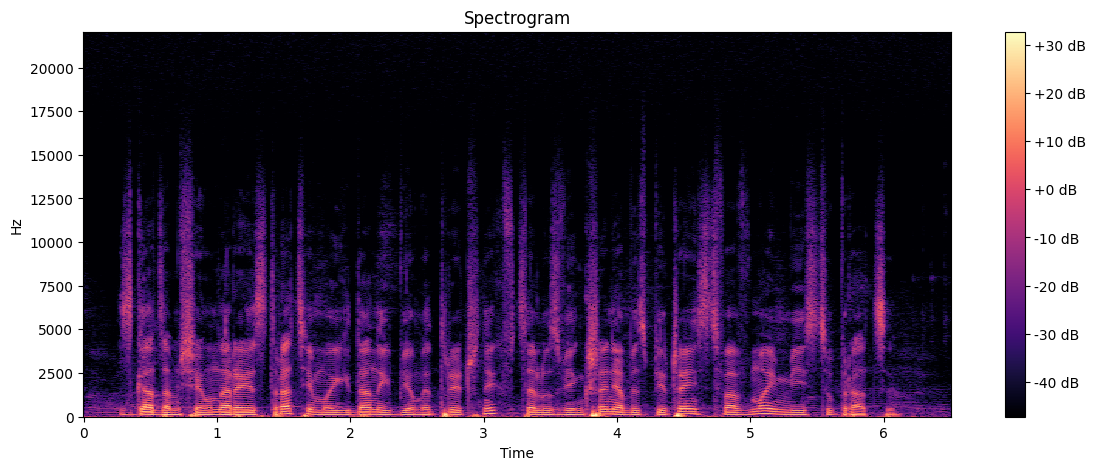

In [ ]:

# Zamień 'filename.wav' na aktualną nazwę pliku
audio_path = '180150_01_02.wav'
audio, sr = librosa.load(audio_path, sr=None)

# Wyświetl spektrogram
S = librosa.stft(audio)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


Definicja algorytmu Griffin-Lim, synteza z wykorzystaniem wcześniej stworzonego spektrogramu oraz algorytmu

In [ ]:

# Algorytm Griffin-Lim
def griffin_lim(spectrogram, sr, n_iter=100, n_fft=2048, hop_length=512):
    # Inicjalizacja rekonstrukcji z losową informacją o fazie I
    angles = np.exp(2j * np.pi * np.random.rand(*spectrogram.shape))
    S_complex = np.abs(spectrogram) * angles

    for i in range(n_iter):
        # Rekonstrukcja sygnału w domenice czasowej
        y = librosa.istft(S_complex, hop_length=hop_length)
        # Budowa nowego spektrogramu
        rebuilt = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        # Aktualizacja informacji o fazie
        angles = np.exp(1j * np.angle(rebuilt))
        S_complex = np.abs(spectrogram) * angles

    return y
#Liczba iteracji algorytmu, im więcej tym dokładniejsza rekonsturkcja
n_iter=100

# Należy wykorzystać oryginalny spektrogram oznaczony zmienną 'S' aby algorymt Griffin-Lim zadziałał poprawnie
synthesized_audio = griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512)

Wyświetlenie spektrogramu z wygenerowanego sygnału

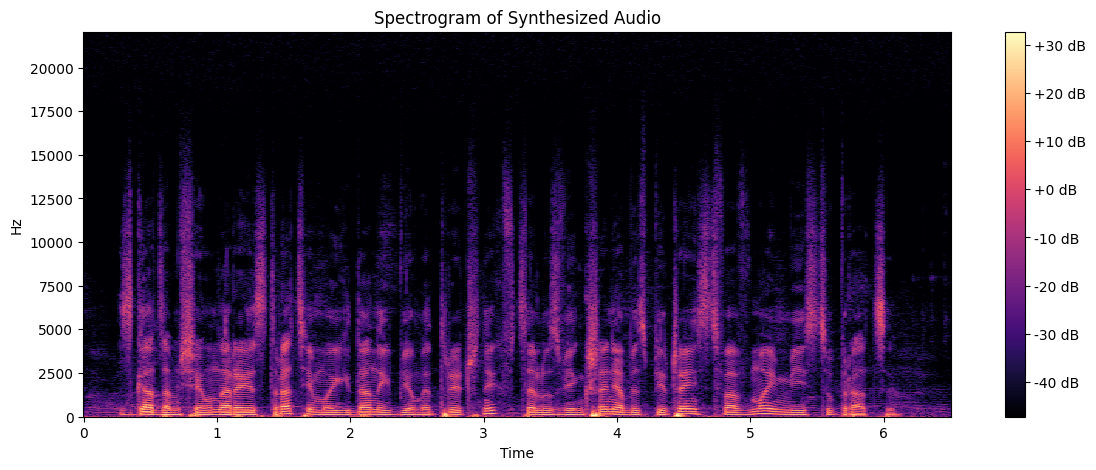

In [ ]:
# Wyświetlenie spektrogramu syntezowanego pliku
S_synthesized = librosa.stft(synthesized_audio)
S_db_synthesized = librosa.amplitude_to_db(abs(S_synthesized))
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db_synthesized, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Synthesized Audio')
plt.show()

# Odtworzenie pliku
ipd.Audio(synthesized_audio, rate = 22050)

# **Zadania**

Zadanie 1.

Wygnerować na podstawie zarejestrowaneog przez siebie materiału na poprzednich laboratoriach kilka przykładów pliku. Odsłuchać je i ocenić ich jakość w skali MOS. Czy w plikach słychać artefakty, zmiany poziomu głośności, zniekształcenia. Jeśli tak opisać ich rodzaj.



Zadanie 2.

Zmieniając wartośc zmiennej `n_iter` w zakresach <1, 1000> sprawdzić jakość otrzymywanego sygnału. Ocenić otrzymane pliki w skali MOS.


Zadanie 3.

Wygenerować pliki audio z wykorzystaniem wejściowych plików po augmentacji np. szum biały, pitch shift, dodanie pogłosu. Czy algorytm radzi sobie z odtworzeniem tych efektów?



Zadanie 1

In [ ]:
import os
import torchaudio
import IPython.display as ipd

directory = os.fsencode('/content/')
y = []
i = 0
n_iter=100
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  if filename[-3:] == 'wav' and filename[:3] == '180':
    print(filename)
    x, sr = librosa.load('/content/'+filename)
    S = librosa.stft(x)
    y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))

180169_24_03.wavf.wav
180169_26_03.wav
180150_242_01.wavf.wav
180150_241_01.wav
180150_02_02.wav
180150_03_02.wavf.wav
180150_02_02.wavf.wav
180169_25_03.wav
180169_25_03.wavf.wav
180169_26_03.wavf.wav
180150_01_02.wavf.wav
180150_242_01.wav
180150_241_01.wavf.wav
180150_01_02.wav
180169_24_03.wav
180150_243_01.wavf.wav
180150_243_01.wav
180150_03_02.wav


In [ ]:
x, sr = librosa.load('/content/'+'180150_241_01.wav')
ipd.Audio(x, rate=sr)

In [ ]:
ipd.Audio(y[17], rate=sr)

180169_26_03.wav - ocena: 2

180150_241_01.wav - ocena: 3.8

180150_02_02.wav - ocena: 4

180169_25_03.wav - ocena: 2.6

180150_242_01.wav - ocena: 4

180150_01_02.wav - ocena: 4.1

180169_24_03.wav - ocena: 2

180150_243_01.wav - ocena: 3.6

180150_03_02.wav - ocena: 3.8

Zadanie 2

In [ ]:
import os
import torchaudio
import IPython.display as ipd

y = []
x, sr = librosa.load('/content/180150_02_02.wav')
S = librosa.stft(x)
n_iter=1
y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))
n_iter=10
y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))
n_iter=100
y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))
n_iter=1000
y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))

In [ ]:
ipd.Audio(y[0], rate=sr)

In [ ]:
ipd.Audio(y[1], rate=sr)

In [ ]:
ipd.Audio(y[2], rate=sr)

In [ ]:
ipd.Audio(y[3], rate=sr)

n_iter = 1 - ocena: 1.7

n_iter = 10 - ocena: 2.8

n_iter = 100 - ocena: 4

n_iter = 1000 - ocena: 4.4

Zadanie 3

In [ ]:
directory = os.fsencode('/content/')
y = []
i = 0
n_iter=100
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  if filename[-5:] == 'f.wav' and filename[:3] == '180':
    print(filename)
    x, sr = librosa.load('/content/'+filename)
    S = librosa.stft(x)
    y.append(griffin_lim(S, sr=sr, n_iter=n_iter, n_fft=2048, hop_length=512))

180169_24_03.wavf.wav
180150_242_01.wavf.wav
180150_03_02.wavf.wav
180150_02_02.wavf.wav
180169_25_03.wavf.wav
180169_26_03.wavf.wav
180150_01_02.wavf.wav
180150_241_01.wavf.wav
180150_243_01.wavf.wav


In [ ]:
x, sr = librosa.load('/content/'+'180150_241_01.wavf.wav')
ipd.Audio(x, rate=sr)

In [ ]:
ipd.Audio(y[7], rate=sr)

Efekty augmentacji takie jak dodatkowy szum czy pogłos są naprawdę dobrze odtwarzane przez syntezator Griffin-Lim.